# Элементарное введение в классификацию объектов с помощью нейронных сетей
Виталий Воробьев (vvorob@inp.nsk.su)

21.11.2019

## Логистическая регрессия
Задача: построить модель для бинарной классификации $n$-мерных векторов $x$

Input: $N$ объектов $x_i$ и их соответвующие типы $y_i$

Модель:
* Берём линейную комбинацию $$z = \sum_j w_jx_j + b$$
* Используем логистическую функцию (сигмоид) для классификации  $$\sigma(z) = \frac{1}{1+e^{-z}},$$
* Получаем предсказания модели

$$
\begin{cases}
 \text{класс}~1, & \text{если}~\sigma(z) \geq 0.5 \\
 \text{класс}~2, & \text{если}~\sigma(z) < 0.5
\end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [2]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

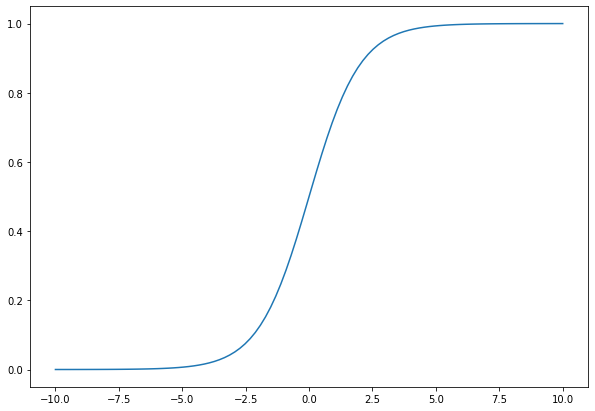

In [3]:
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(10, 7))
plt.plot(x, sigmoid(x));

## Оптимизация модели: cross entropy
Оптимальные значения параметров модели $w_j$ и $b$ соответствуют минимуму целевой функции (перекрёстная энтропия)
$$
J(w_j, b) = -\frac{1}{N}\sum\limits_{i = 1}^{N} \left[y_i\ln{\sigma(z_i)} + (1-y_i)\ln{\left(1 - \sigma(z_i)\right)}\right].
$$

Минимум будем искать методом градиентного спуска. Понадобятся следующие частные производные:
$$
\frac{\partial J}{\partial w_j} = 
        \frac{1}{N}\sum\limits_{i=1}^N \left[\left(\sigma(z_i) - y_i\right)x_j^{(i)}\right],\quad
\frac{\partial J}{\partial b} = 
        \frac{1}{N}\sum\limits_{i=1}^N \left[\sigma(z_i) - y_i\right].
$$

Производная сигмоиды:
$$\frac{d\sigma(z)}{dz} = \sigma(z)\left(1-\sigma(z)\right).$$

In [4]:
def dsigm(a):
    return a * (1 - a)

In [5]:
def xentropy(a, y):
    return -np.mean(y*np.log(a) + (1.-y)*np.log(1.-a))

In [6]:
def inirand(ri, rj, scale=1):
    return scale*(np.random.rand(ri, rj) - 0.5)

In [7]:
def appone(x):
    return np.column_stack([x, np.ones(x.shape[0])])

In [8]:
def lincomb(x, w):
    return np.dot(appone(x), w)

In [9]:
def make_logistics(w):
    return lambda x: sigmoid(lincomb(x, w))

In [14]:
def train(x, y, eta, eps=1.e-3, max_iter=10000):
    """ Gradient descent for logistic regression
        x: [N x r],  y: [N x 1],  eta: gradient step
    """
    N, r = x.shape
    w = inirand(r+1, 1, 1)
    
    def forward():
        a = sigmoid(lincomb(x, w))
        return (xentropy(a, y), a)
    
    J, a = forward()

    cur_iter = 0
    while cur_iter < max_iter:
        if not cur_iter % 10:
            print('it: {:4d}, J: {:.4f}, w: {}'.format(cur_iter, J, w.ravel()))
        w -= eta * np.dot(appone(x).T, a - y) / N
        Jnew, a = forward()

        if Jnew > J:
            print('train: divergence detected')
            return (None, None)
        if J - Jnew < eps:
            print('train: correct fit')
            break

        J = Jnew
        cur_iter += 1

    if cur_iter == max_iter:
        print('train: max number of iterations reached')

    return (make_logistics(w), w)

In [10]:
def make_scatter(x, y, size=10):
    plt.scatter(x[(y==1).ravel()][:,0], x[(y==1).ravel()][:,1], size)
    plt.scatter(x[(y==0).ravel()][:,0], x[(y==0).ravel()][:,1], size)
    plt.axis('equal')
    plt.grid()

In [11]:
def selector(x, alpha=30):
    """ x [N x 2] array """
    alpha = alpha / 180 * np.pi
    return (x[:,0] * np.cos(alpha) + x[:,1] * np.sin(alpha)) > 0

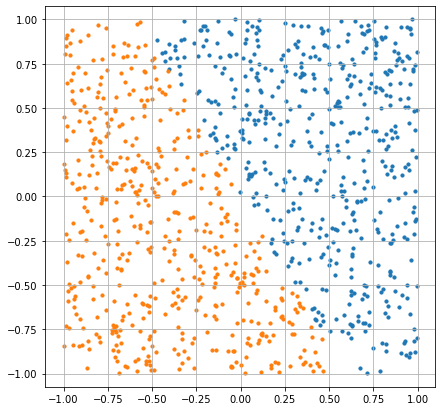

In [12]:
N = 10**3
x = 2*np.random.rand(N, 2)-1
y = np.array(selector(x), dtype=int).reshape(-1, 1)

plt.figure(num=1, figsize=(7,7))
make_scatter(x, y, 10)

In [15]:
%%time
f, w = train(x, y, eta=1.5, eps=1.e-5, max_iter=100000)

it:    0, J: 0.6073, w: [ 0.19087205  0.48672387 -0.05112396]
it:   10, J: 0.3078, w: [ 2.15668036  1.20062661 -0.01829872]
it:   20, J: 0.2360, w: [ 3.10573273  1.6266726  -0.02128556]
it:   30, J: 0.2015, w: [ 3.74614707  1.96037372 -0.02201943]
it:   40, J: 0.1802, w: [ 4.24040879  2.23835643 -0.0218425 ]
it:   50, J: 0.1653, w: [ 4.64913643  2.47741517 -0.02128571]
it:   60, J: 0.1542, w: [ 5.00127952  2.68757727 -0.02056913]
it:   70, J: 0.1454, w: [ 5.31289752  2.87545637 -0.01979516]
it:   80, J: 0.1382, w: [ 5.5938515   3.04565663 -0.0190138 ]
it:   90, J: 0.1322, w: [ 5.8506574   3.20150508 -0.01824951]
it:  100, J: 0.1271, w: [ 6.08786518  3.34547722 -0.01751373]
it:  110, J: 0.1227, w: [ 6.30879087  3.47946027 -0.01681106]
it:  120, J: 0.1188, w: [ 6.51593467  3.60492322 -0.01614254]
it:  130, J: 0.1153, w: [ 6.71123418  3.72303052 -0.01550739]
it:  140, J: 0.1122, w: [ 6.89622531  3.83472001 -0.01490394]
it:  150, J: 0.1094, w: [ 7.07214887  3.94075783 -0.01433014]
it:  160

In [16]:
def show_model(f, cbar=True):
    grid_size = 250
    s = np.linspace(-1., 1., grid_size)
    x11, x22 = np.meshgrid(s, s)
    z = f(np.row_stack([x11.ravel(), x22.ravel()]).T).reshape(grid_size, -1)
    plt.pcolormesh(x11,x22,z,alpha=0.8)
    if cbar:
        plt.colorbar()

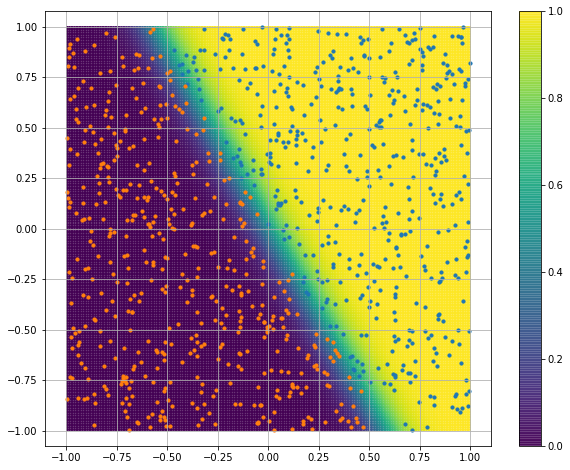

In [17]:
plt.figure(num=2, figsize=(10, 8))
show_model(f)
make_scatter(x, y, 10)

In [18]:
def selector2(x, alpha=30):
    """ x [N x 2] array """
    alpha = alpha / 180 * np.pi
    s, c = np.sin(alpha), np.cos(alpha)
    rot = np.array([[c, -s], [s, c]])
    xrot = np.dot(x, rot)
    return (xrot[:,0]*xrot[:,1]) > 0

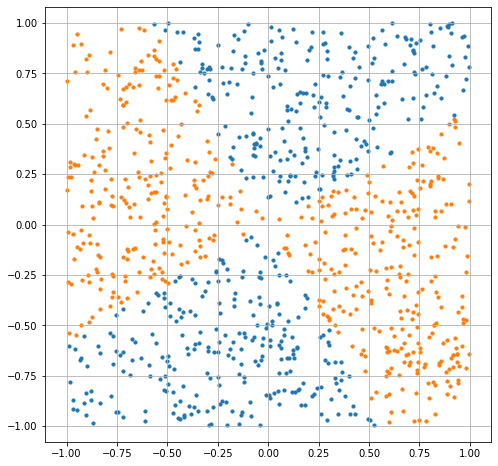

In [19]:
N = 10**3
x = 2*np.random.rand(N, 2)-1
y = np.array(selector2(x), dtype=int).reshape(-1, 1)

plt.figure(num=1, figsize=(8,8))
make_scatter(x, y, 10)

Инструмент для визуализации структуры NN

In [20]:
def make_layer(r, x, dy):
    layer = np.row_stack([x*np.ones(r), np.linspace(0, dy*r, r)]).T
    layer[:,1] += 0.5 - r//2 * dy
    return layer

In [21]:
def pairs(v):
    for x, y in zip(v[:-1], v[1:]):
        yield (x, y)

In [22]:
def drawnn(r, scale, figsize=None):
    """ r is tuple of layer dimensions """
    if figsize is not None:
        plt.figure(figsize=figsize)
    ax = plt.axes()
    xls = scale * np.linspace(0., 1., len(r))
    dy = 1 / max(r)
    neurons = [make_layer(ri, x, dy) for ri, x in zip(r, xls)]
    # draw connections
    for li, lj in pairs(neurons):
        for ni, nj in itertools.product(li, lj):
            ax.add_line(plt.Line2D((ni[0], nj[0]), (ni[1], nj[1]), lw=2.5, ls='-'))
    rad = 0.4*dy
    # draw neurons
    for layer in neurons:
        for neur in layer:
            ax.add_patch(plt.Circle(neur, radius=rad, fc='y', zorder=10))
    plt.axis('off')
    plt.axis('scaled')
    plt.show()

Логистическая регрессия описывает работу одного нейрона

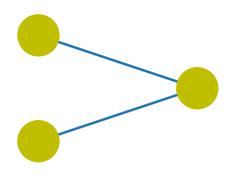

In [23]:
drawnn([2, 1], 1.5, (4,3))

Для нелинейной классификации попробуем натренировать более сложную сеть

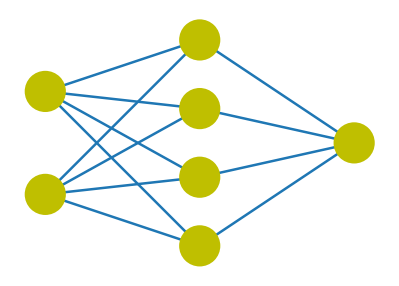

In [24]:
drawnn([2, 4, 1], 1.5, (7,5))

## Backpropagation
$$
\frac{\partial J}{\partial w^{(n)}} = \frac{1}{N}\left[\sigma(z^{(n)})\right]^T \frac{\partial J}{\partial z^{(n+1)}},\quad
\frac{\partial J}{\partial b^{(n)}} = \frac{1}{N}\left[\vec{1}_{[N]}\right]^T\frac{\partial J}{\partial z^{(n+1)}}
$$

$$
[r_{n} \times r_{n+1}] = [N\times r_{n}]^T \cdot [N \times r_{n+1}]
$$

$$
\frac{\partial J}{\partial z^{(n)}} = \frac{\partial J}{\partial z^{(n+1)}} \left[w^{(n)}\right]^T*\sigma(z^{(n)})
$$

$$
[N\times r_{n}] = [N\times r_{n+1}] \cdot [r_{n+1}\times r_{n}] * [N\times r_{n}]
$$

Here $\cdot$ stands for matrix product and $*$ stands for element-wise matrix product.

The output neuron gives
$$
\frac{\partial J}{\partial z^{(\mathrm{last})}} = \sigma\left(z^{(\mathrm{last})}\right) - y
$$

In [25]:
def make_nn(nn):
    """ sigmoid NN """
    def f(x):
        for w in nn:
            x = sigmoid(lincomb(x, w))
        return x
    return f

In [26]:
def train_nn(r, x, y, eta, eps=1.e-6, max_iter=10000, seed=None, init_scale=5):
    """ """
    N, r0 = x.shape
    r = [r0] + list(r) + [1]
    if seed:
        np.random.seed(seed)
    nn = [inirand(x+1, y, init_scale) for x, y in pairs(r)]
    print('init nn with shapes {}'.format([x.shape for x in nn]))

    def forward():
        a = [x]
        for w in nn:
            a.append(sigmoid(lincomb(a[-1], w)))
        return (xentropy(a[-1], y), a)
    J, A = forward()
    cur_iter = 0
    while cur_iter < max_iter:
        if not cur_iter % 100:
            print('it: {:5d}, J: {:.4f}'.format(cur_iter, J))
        delta = A[-1] - y
        for a, w in zip(A[::-1][1:], nn[::-1]):
            delta_new = np.dot(delta, w[:-1,:].T) * a * (1-a)
            w -= eta * np.dot(appone(a).T, delta) / N
            delta = delta_new
        Jnew, A = forward()
        if Jnew > J:
            print('divergent fit')
            break
        if J - Jnew < eps:
            print('training completed')
            break
        J = Jnew
        cur_iter += 1
    if cur_iter == max_iter:
        print('train: max number of iterations reached')
    return (make_nn(nn), nn)

In [27]:
%%time
f, nn = train_nn([4], x, y, eta=1.5, eps=1.e-6, max_iter=100000, seed=None)

init nn with shapes [(3, 4), (5, 1)]
it:     0, J: 1.2255
it:   100, J: 0.6622
it:   200, J: 0.6060
it:   300, J: 0.4446
it:   400, J: 0.2747
it:   500, J: 0.2130
it:   600, J: 0.1837
it:   700, J: 0.1664
it:   800, J: 0.1547
it:   900, J: 0.1460
it:  1000, J: 0.1393
it:  1100, J: 0.1338
it:  1200, J: 0.1291
it:  1300, J: 0.1252
it:  1400, J: 0.1217
it:  1500, J: 0.1187
it:  1600, J: 0.1159
it:  1700, J: 0.1135
it:  1800, J: 0.1112
it:  1900, J: 0.1092
it:  2000, J: 0.1073
it:  2100, J: 0.1055
it:  2200, J: 0.1039
it:  2300, J: 0.1023
it:  2400, J: 0.1009
it:  2500, J: 0.0995
it:  2600, J: 0.0982
it:  2700, J: 0.0970
it:  2800, J: 0.0958
it:  2900, J: 0.0947
it:  3000, J: 0.0936
it:  3100, J: 0.0926
it:  3200, J: 0.0917
it:  3300, J: 0.0907
it:  3400, J: 0.0899
it:  3500, J: 0.0890
it:  3600, J: 0.0882
it:  3700, J: 0.0874
it:  3800, J: 0.0866
it:  3900, J: 0.0859
it:  4000, J: 0.0852
it:  4100, J: 0.0845
it:  4200, J: 0.0838
it:  4300, J: 0.0831
it:  4400, J: 0.0825
it:  4500, J: 0.08

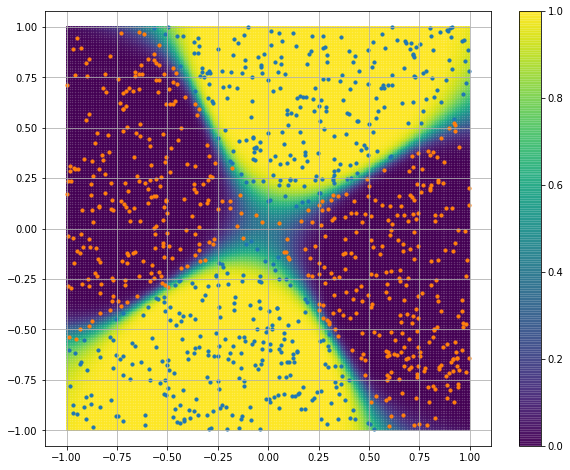

In [28]:
plt.figure(num=4, figsize=(10, 8))
show_model(f)
make_scatter(x, y, 10)

Что делает каждый нейрон?

In [29]:
nn

[array([[ 1.67192544, -7.32625928,  8.27960842,  1.90046222],
        [ 6.49352248,  1.88055583, -2.24126744,  6.09923538],
        [ 2.94489564,  3.39737609,  3.84500564, -2.77908946]]),
 array([[-28.04713019],
        [ 25.66511142],
        [ 24.12811387],
        [ 28.2151331 ],
        [-23.87836158]])]

In [30]:
import matplotlib.gridspec as gridspec

In [31]:
def make_nn_full(nn):
    """ sigmoid NN """
    def f(x):
        a = [x]
        for w in nn:
            a.append(sigmoid(lincomb(a[-1], w)))
        return a
    return f

In [32]:
def show_layer_responce(x, y, model, layer, cols, rows, figsize=(14, 3.5)):
    fig4 = plt.figure(constrained_layout=True, figsize=figsize)
    spec4 = gridspec.GridSpec(ncols=cols, nrows=rows, figure=fig4)
    for idx in range(cols*rows):
        ax = fig4.add_subplot(spec4[idx // cols, idx % cols])
        show_model(lambda x: model(x)[layer][:,idx % cols], False)
        make_scatter(x, y, 10)
        plt.axis('off')

In [33]:
model = make_nn_full(nn)

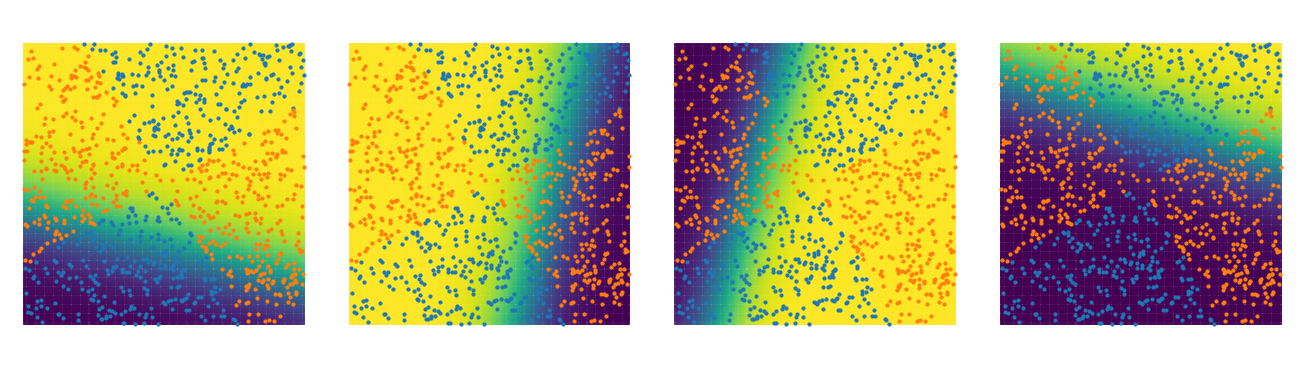

In [34]:
show_layer_responce(x, y, model, 1, 4, 1, (18, 5))

Похоже, что наша сеть не уловила суть ...

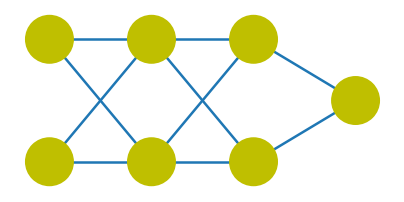

In [35]:
drawnn([2, 2, 2, 1], 2.5, (7,5))

In [36]:
%%time
f, nn = train_nn([2, 2], x, y, eta=1.5, eps=1.e-6, max_iter=100000, seed=55, init_scale=10)

init nn with shapes [(3, 2), (3, 2), (3, 1)]
it:     0, J: 1.7169
it:   100, J: 0.3686
it:   200, J: 0.1786
it:   300, J: 0.1216
it:   400, J: 0.0965
it:   500, J: 0.0823
it:   600, J: 0.0730
it:   700, J: 0.0663
it:   800, J: 0.0613
it:   900, J: 0.0574
it:  1000, J: 0.0542
it:  1100, J: 0.0515
it:  1200, J: 0.0492
it:  1300, J: 0.0472
it:  1400, J: 0.0454
it:  1500, J: 0.0438
it:  1600, J: 0.0424
it:  1700, J: 0.0411
it:  1800, J: 0.0399
it:  1900, J: 0.0388
it:  2000, J: 0.0378
it:  2100, J: 0.0368
it:  2200, J: 0.0359
it:  2300, J: 0.0351
it:  2400, J: 0.0344
it:  2500, J: 0.0337
it:  2600, J: 0.0330
it:  2700, J: 0.0324
it:  2800, J: 0.0318
it:  2900, J: 0.0312
it:  3000, J: 0.0307
it:  3100, J: 0.0302
it:  3200, J: 0.0298
it:  3300, J: 0.0293
it:  3400, J: 0.0289
it:  3500, J: 0.0285
it:  3600, J: 0.0281
it:  3700, J: 0.0278
it:  3800, J: 0.0274
it:  3900, J: 0.0271
it:  4000, J: 0.0268
it:  4100, J: 0.0265
it:  4200, J: 0.0262
it:  4300, J: 0.0260
it:  4400, J: 0.0257
it:  4500,

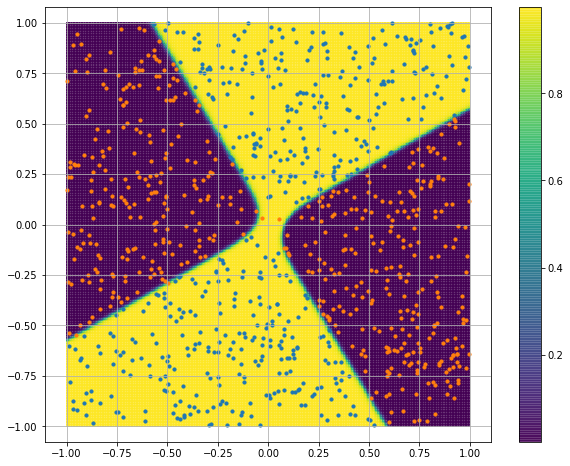

In [37]:
plt.figure(num=6, figsize=(10, 8))
show_model(f)
make_scatter(x, y, 10)

In [38]:
nn

[array([[-17.26615174,  11.21161604],
        [-10.25190906, -19.60056821],
        [  0.22009121,  -0.35684216]]), array([[  9.10365539, -10.58408644],
        [-10.62558698,  10.50897615],
        [ -4.92222419,  -4.59468791]]), array([[-15.5428688 ],
        [-16.06997674],
        [  6.51838198]])]

In [43]:
model = make_nn_full(nn)

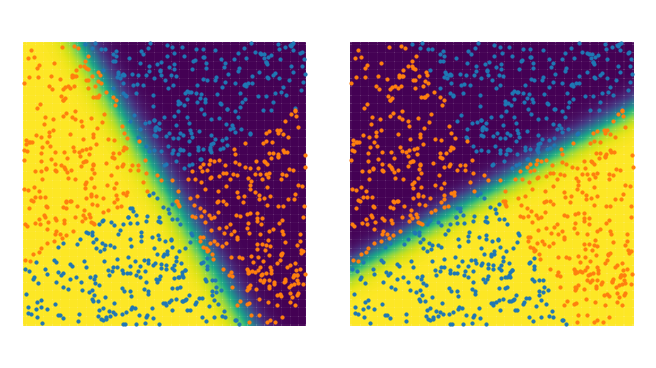

In [40]:
show_layer_responce(x, y, model, 1, 2, 1, (9, 5))

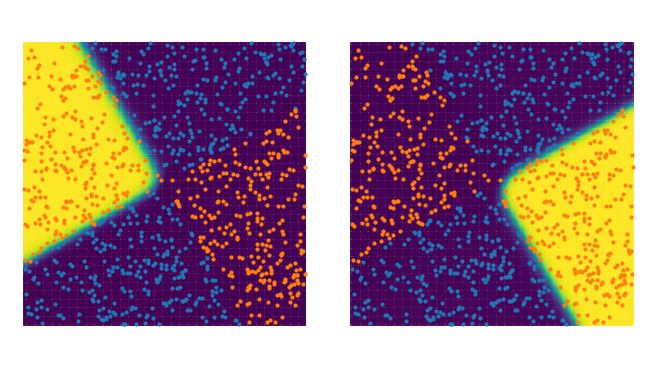

In [41]:
show_layer_responce(x, y, model, 2, 2, 1, (9, 5))

In [44]:
def selector3(x, r=0.6):
    """ x [N x 2] array """
    return (x**2).sum(axis=-1) < r**2

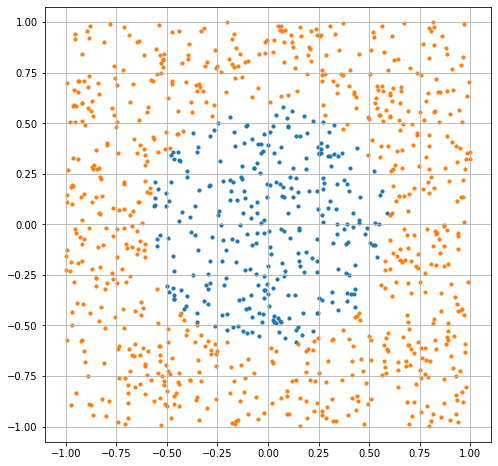

In [45]:
N = 10**3
x = 2*np.random.rand(N, 2)-1
y = np.array(selector3(x), dtype=int).reshape(-1, 1)

plt.figure(num=1, figsize=(8,8))
make_scatter(x, y, 10)

In [49]:
%%time
f, nn = train_nn([8, 4], x, y, eta=1.5, eps=1.e-6, max_iter=100000, seed=15, init_scale=10)

init nn with shapes [(3, 8), (9, 4), (5, 1)]
it:     0, J: 0.6361
it:   100, J: 0.5226
it:   200, J: 0.1656
it:   300, J: 0.0948
it:   400, J: 0.0704
it:   500, J: 0.0574
it:   600, J: 0.0493
it:   700, J: 0.0440
it:   800, J: 0.0403
it:   900, J: 0.0375
it:  1000, J: 0.0352
it:  1100, J: 0.0332
it:  1200, J: 0.0315
training completed
CPU times: user 778 ms, sys: 0 ns, total: 778 ms
Wall time: 783 ms


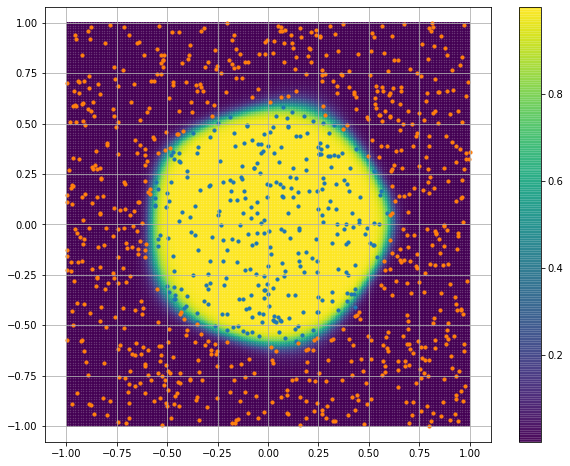

In [50]:
plt.figure(num=6, figsize=(10, 8))
show_model(f)
make_scatter(x, y, 10)

In [51]:
model = make_nn_full(nn)

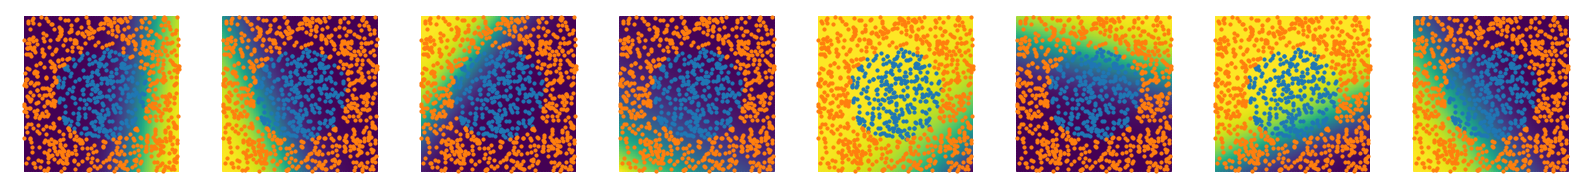

In [52]:
show_layer_responce(x, y, model, 1, 8, 1, (22, 2.5))

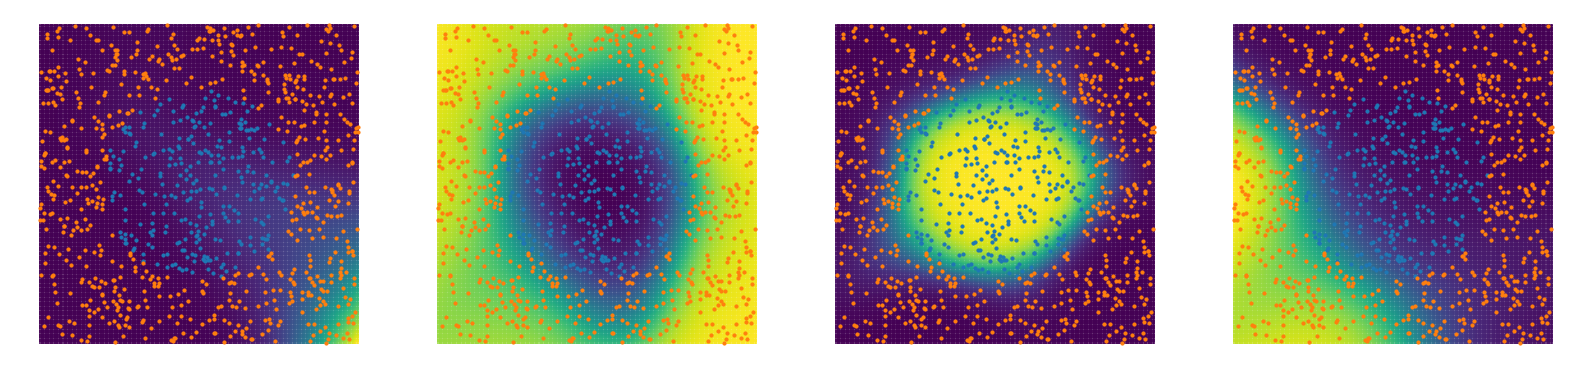

In [53]:
show_layer_responce(x, y, model, 2, 4, 1, (22, 5))

# Промежуточные итоги
* Каждый нейрон выполняет линейную классификацию по какому-либо признаку
* Каждый следующий слой сети обучается всё более высокоуровневым признакам. Именно поэтому глубокие нейронные сети могут распознавать очень сложные объекты и паттерны
* Инициализация весов случайными значениями необходима, чтобы разрушить симметрию
* Нелинейность функции активации является ключевым фактором. Линейная функция активации приведёт к тому, что любая сеть будет выполнять линейное преобразование
* До сих пор нам приходилось в деталях разбираться что делает каждый нейрон, чтобы получить хороший результат. Это в корне неверный подход к машинному обучению

# Часть 2. Продвинутый градиентный спуск и фит с регуляризацией
Большие нейронные сети содержат большое количество параметров и подвержены эффекту перетренировки (представьте себе фит полиномом 24 степени)

Перетренированная сеть выучивает особенности конкретных примеров вместе с общими закономерностями и плохо работает с примерами, которых она раньше не видела

Основные способы борьбы с перетренировкой:
* Early stop
* Drop out
* L1 и L2 регуляризация

L2 регуляризация
$$
J \to J + \lambda_2\sum\limits_{j,k,n} \left(w^{(n)}_{jk}\right)^2
$$

L1 регуляризация
$$
J \to J + \lambda_1\sum\limits_{j,k,n} |w^{(n)}_{jk}|
$$

Чтобы натренировать большую нейронную сеть необходимо использовать очень много данных. Стандартный градиентный спуск в этой ситуации работал бы слишком долго.

Первая важная оптимизация - mini batch градиентный спуск:
* набор данных разделяется на несколько частей
* шаг градиентного спуска делается для каждой части

После обработки полного набора данных таким образом уже сделано несколько шагов минимизации.

Другая проблема - сложный ландшафт пространства параметров.

## Метод сохранения импульса

Qian, N. (1999). On the momentum term in gradient descent learning algorithms. Neural Networks : The Official Journal of the International Neural Network Society, 12(1), 145–151.  
http://doi.org/10.1016/S0893-6080(98)00116-6

$$
\Delta w^{(n)} = \gamma \Delta w^{(n-1)} - \eta \frac{\partial J}{\partial w^{(n)}}
$$

![д](plots/without_momentum.gif)
![title](plots/with_momentum.gif)

## Ускоренный градиент Нестерова
Nesterov, Y. (1983). A method for unconstrained convex minimization problem with the rate of convergence o(1/k2). Doklady ANSSSR (translated as Soviet.Math.Docl.), vol. 269, pp. 543– 547.

$$
\Delta w^{(n)} = \gamma \Delta w^{(n-1)} - \eta \frac{\partial J}{\partial w^{(n)}}\left(w^{(n-1)} - \gamma \Delta w^{(n-1)}\right)
$$

## RMSprop
[Geoff Hinton lecture](http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)

$$
E[g^2]_t = 0.9 E[g^2]_{t-1} + 0.1g_t^2
$$

$$
\theta_{t+1} = \theta_{t} - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}}g_t
$$

## Adaptive Moment Estimation (ADAM)
$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t,\quad
v_t = \beta_2 v_{t−1} + (1 − \beta_2)g_t^2
$$
Unbiased estimations
$$
\hat{m}_t = \frac{m_t}{1 - \beta_1},\quad
\hat{v}_t = \frac{v_t}{1 - \beta_2},\quad
$$

$$
\theta^{(t+1)} = \theta^{(t)} - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t
$$

Recommended values are
$$
\beta_1 = 0.99,\quad \beta_2 = 0.999, \quad \epsilon = 10^{-8},\quad \eta=10^{-4}
$$

ADAM - de facto стандарт адаптивного градиентного спуска

![д](plots/contours_evaluation_optimizers.gif)
![title](plots/saddle_point_evaluation_optimizers.gif)

In [54]:
class Adam(object):
    """ Adaptive Moment Estimation for gradient descent """
    def __init__(self, beta1=0.99, beta2=0.999, eps=10**-8):
        self.b1, self.a1 = beta1, 1-beta1
        self.b2, self.a2 = beta2, 1-beta2
        self.e = eps
        self.m = 0
        self.v = 0

    def __call__(self, g):
        """ Calculates moments for a given gradient vector """
        self.m = self.b1 * self.m + self.a1 * g
        self.v = self.b2 * self.v + self.a2 * g**2
        return self.m / self.a1 / (np.sqrt(self.v / self.a2) + self.e)

In [55]:
class NNBinary(object):
    """ Neural network for binary classification """
    def __init__(self, r):
        self.r = r + [1]
        self.npars = self.nparams()
        print(self.npars)

    def nparams(self):
        """ Total number of parameters in NN """
        return [0] + list(itertools.accumulate([(ri+1)*rj for ri, rj in pairs(self.r)]))

    def make_batches(self, x, y, bsize):
        """ Divide data into batches """
        if bsize >= self.N:
            return [[x, y]]
        batch = []
        edges = list(range(0, self.N+1, bsize))[:-1] + [self.N]
        for idx, jdx in pairs(edges):
            batch.append([x[idx:jdx], y[idx:jdx]])
        return batch

    def weight_views(self, w):
        return [w.ravel()[ni:nj].reshape(ri+1, -1) for [ni, nj], ri in zip(pairs(self.npars), self.r)]
    
    def set_bias_mask(self):
        self.bias_mask = np.ones(self.wght.shape, dtype=bool)
        for nj, ri in zip(self.npars[1:], self.r):
            self.bias_mask[nj-ri:nj] = False

    def evaluate(self, x, y):
        a = x.copy()
        for w in self.wl:
            a = sigmoid(lincomb(a, w))
        return xentropy(a, y)

    def forward(self, x):
        a = [x]
        for w in self.wl:
            a.append(sigmoid(lincomb(a[-1], w)))
        return a

    def train(self, x, y, eta=1.e-4, batch=100, eps=1.e-6, max_iter=10**5, seed=None,
              x_test=None, y_test=None, early_stop=True, l1=None, l2=None, init=1):
        assert(self.r[0] == x.shape[1])
        self.eta = eta
        self.early_stop = early_stop and x_test is not None
        self.N = x.shape[0]
        self.eps = eps
        self.err = False
        self.log = {key: [] for key in ['j', 'tj']}
        self.l2 = l2

        if seed:
            np.random.seed(seed)
        # allocate all weights
        self.wght = inirand(self.npars[-1], 1, init)
        self.grad = np.empty(self.wght.shape)
        # make weight vies for each layer
        self.wl, self.gl = [self.weight_views(a) for a in [self.wght, self.grad]]
        self.set_bias_mask()
        
        print(self.wght.shape)
        for w in self.wl:
            print(w.shape)

        def eval(check_condition=True):
            self.log['j'].append(self.evaluate(x, y))
            if x_test is not None:
                self.log['tj'].append(self.evaluate(x_test, y_test))
            if check_condition:
                return self.stop_conditions()
        eval(False)

        # mini-batches
        batches = self.make_batches(x, y, batch)
        print(len(batches))
        # adaptive moments
        self.adam = Adam()

        cur_iter = 0
        while cur_iter < max_iter:
            if not cur_iter % 100:
                print('it: {:5d}, J: {:.4f}'.format(cur_iter, self.log['j'][-1]))
            for xi, yi in batches:
                self.process(xi, yi)
            if eval():
                break
            cur_iter += 1
        if cur_iter == max_iter:
            print('train: max number of iterations reached')
        return not self.err

    def process(self, xi, yi):
        ai = self.forward(xi)
        delta = ai[-1] - yi
        grad = []
        for a, w, g in zip(ai[::-1][1:], self.wl[::-1], self.gl[::-1]):
            g[:,:] = np.dot(appone(a).T, delta) / self.N
            delta = np.dot(delta, w[:-1].T) * dsigm(a)
        if self.l2 is not None:
            self.grad[self.bias_mask] += 2.* self.l2 * self.wght[self.bias_mask]
        self.wght -= self.eta * self.adam(self.grad)

    def stop_conditions(self):
        if self.early_stop and self.log['tj'][-1] > self.log['tj'][-2]:
            print('early stop')
            return True
        if self.log['j'][-1] > self.log['j'][-2]:
            print('divergent fit')
            self.err = True
            return True
        if self.log['j'][-2] - self.log['j'][-1] < self.eps:
            print('training completed')
            return True
        return False

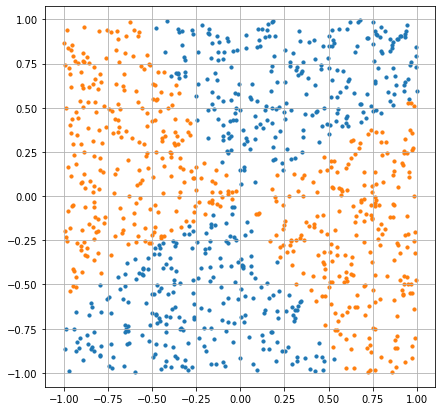

In [56]:
N = 10**3
x = 2*np.random.rand(N, 2)-1
y = np.array(selector2(x), dtype=int).reshape(-1, 1)

plt.figure(num=1, figsize=(7,7))
make_scatter(x, y, 10)

In [57]:
%%time
nn = NNBinary([2, 8, 4])
nn.train(x, y, eta=0.0001, batch=1000, eps=1.e-6, seed=1, l2=0.0002, init=2);

[0, 24, 60, 65]
(65, 1)
(3, 8)
(9, 4)
(5, 1)
1
it:     0, J: 0.9073
it:   100, J: 0.8410
it:   200, J: 0.7793
it:   300, J: 0.7406
it:   400, J: 0.7178
it:   500, J: 0.7046
it:   600, J: 0.6974
it:   700, J: 0.6937
it:   800, J: 0.6919
it:   900, J: 0.6910
it:  1000, J: 0.6906
it:  1100, J: 0.6902
it:  1200, J: 0.6899
it:  1300, J: 0.6897
it:  1400, J: 0.6893
it:  1500, J: 0.6890
it:  1600, J: 0.6886
it:  1700, J: 0.6882
it:  1800, J: 0.6878
it:  1900, J: 0.6873
it:  2000, J: 0.6868
it:  2100, J: 0.6862
it:  2200, J: 0.6856
it:  2300, J: 0.6849
it:  2400, J: 0.6840
it:  2500, J: 0.6831
it:  2600, J: 0.6821
it:  2700, J: 0.6810
it:  2800, J: 0.6798
it:  2900, J: 0.6783
it:  3000, J: 0.6768
it:  3100, J: 0.6750
it:  3200, J: 0.6730
it:  3300, J: 0.6707
it:  3400, J: 0.6682
it:  3500, J: 0.6654
it:  3600, J: 0.6624
it:  3700, J: 0.6590
it:  3800, J: 0.6554
it:  3900, J: 0.6515
it:  4000, J: 0.6474
it:  4100, J: 0.6431
it:  4200, J: 0.6386
it:  4300, J: 0.6339
it:  4400, J: 0.6290
it:  450

True

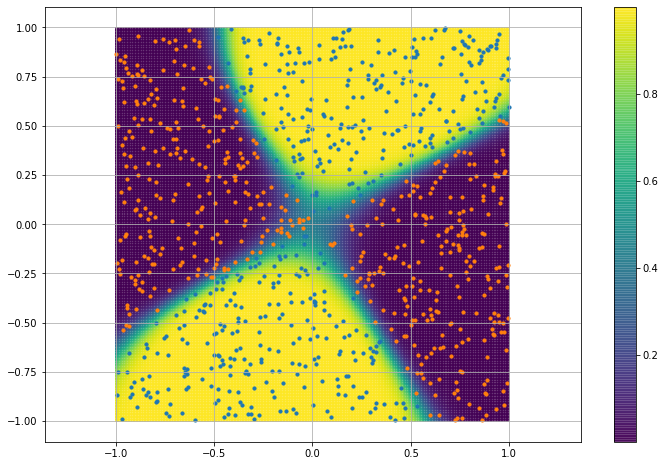

In [58]:
plt.figure(num=1, figsize=(12,8))
show_model(lambda x: nn.forward(x)[-1])
make_scatter(x, y, 10)

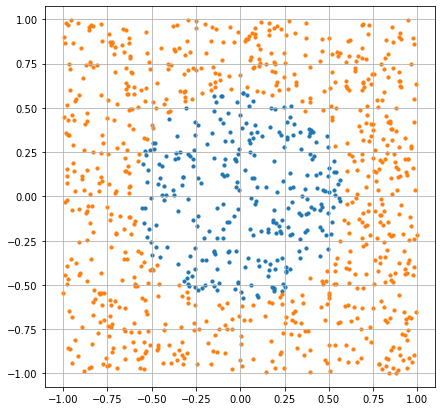

In [59]:
N = 10**3
x = 2*np.random.rand(N, 2)-1
y = np.array(selector3(x), dtype=int).reshape(-1, 1)

plt.figure(num=1, figsize=(7,7))
make_scatter(x, y, 10)

In [60]:
%%time
nn = NNBinary([2, 64, 16])
nn.train(x, y, eta=0.0001, batch=1000, eps=1.e-5, seed=115, l2=0.0001, init=5);

[0, 192, 1232, 1249]
(1249, 1)
(3, 64)
(65, 16)
(17, 1)
1
it:     0, J: 3.2164
it:   100, J: 1.3038
it:   200, J: 0.6986
it:   300, J: 0.6665
it:   400, J: 0.6098
it:   500, J: 0.5785
it:   600, J: 0.5654
it:   700, J: 0.5476
it:   800, J: 0.5278
it:   900, J: 0.5066
it:  1000, J: 0.4859
it:  1100, J: 0.4682
it:  1200, J: 0.4540
it:  1300, J: 0.4419
it:  1400, J: 0.4300
it:  1500, J: 0.4162
it:  1600, J: 0.4030
it:  1700, J: 0.3899
it:  1800, J: 0.3764
it:  1900, J: 0.3628
it:  2000, J: 0.3491
it:  2100, J: 0.3352
it:  2200, J: 0.3183
it:  2300, J: 0.2939
it:  2400, J: 0.2748
it:  2500, J: 0.2588
it:  2600, J: 0.2451
it:  2700, J: 0.2327
it:  2800, J: 0.2215
it:  2900, J: 0.2115
it:  3000, J: 0.2025
it:  3100, J: 0.1942
it:  3200, J: 0.1863
it:  3300, J: 0.1787
it:  3400, J: 0.1712
it:  3500, J: 0.1637
it:  3600, J: 0.1563
it:  3700, J: 0.1492
it:  3800, J: 0.1426
it:  3900, J: 0.1364
it:  4000, J: 0.1309
it:  4100, J: 0.1258
it:  4200, J: 0.1212
it:  4300, J: 0.1170
it:  4400, J: 0.11

True

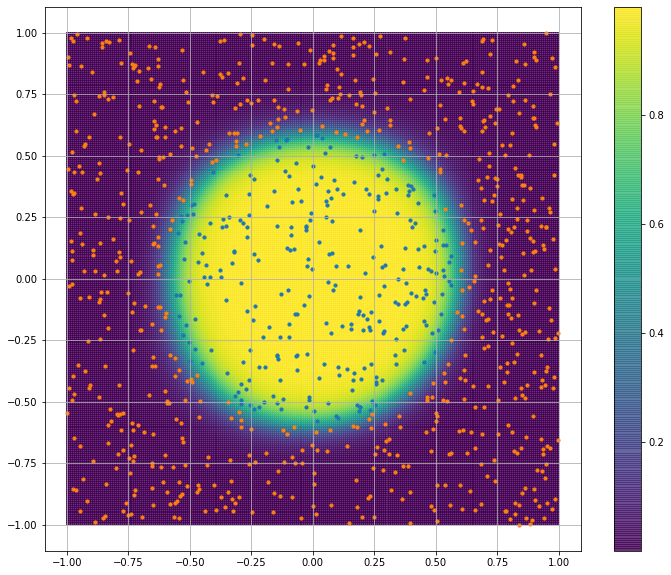

In [61]:
plt.figure(num=1, figsize=(12,10))
show_model(lambda x: nn.forward(x)[-1])
make_scatter(x, y, 10)

# Выводы
* Нейронные сети - это мощный инструмент для создания нелинейных моделей
* Методы регуляриции параметров модели и ускорения градиентного спуска открывают путь к созданию чрезвычайно сложных моделей
* Выбор мета-параметров модели (количество слоёв, количество нейронов, коэффициенты регуляризации) - скорее искусство, чем наука
* Не пишите нейронные сети с нуля. Используйте `tensorflow` + `keras`
* Geoffrey Hinton

In [ ]:
def selector4(x):
    """ x [N x 2] array """
    return (2*np.arctan2(x[:,0], x[:,1]) % np.pi) > 0.5*np.pi

In [ ]:
N = 10**3
x = 2*np.random.rand(N, 2)-1
y = np.array(selector4(x), dtype=int).reshape(-1, 1)

plt.figure(num=1, figsize=(10,10))
make_scatter(x, y, 10)

In [ ]:
%%time
nn = NNBinary([2, 8, 4])
nn.train(x, y, eta=0.0001, batch=500, eps=1.e-5, seed=689, l2=0.0001, init=15)

In [ ]:
plt.figure(num=1, figsize=(12,10))
show_model(lambda x: nn.forward(x)[-1])
make_scatter(x, y, 10)

In [ ]:
def selector5(x, r=0.8):
    """ x [N x 2] array """
    return ((2*np.arctan2(x[:,0], x[:,1]) % np.pi) > 0.5*np.pi) | (np.invert(selector3(x, r)))

In [ ]:
N = 10**3
x = 2*np.random.rand(N, 2)-1
y = np.array(selector5(x), dtype=int).reshape(-1, 1)

plt.figure(num=1, figsize=(10,10))
make_scatter(x, y, 10)

In [ ]:
%%time
nn = NNBinary([2, 8, 8, 4])
nn.train(x, y, eta=0.0001, batch=500, eps=1.e-5, seed=789, l2=0.0001, init=15)

In [ ]:
plt.figure(num=1, figsize=(12,10))
show_model(lambda x: nn.forward(x)[-1])
make_scatter(x, y, 10)